<a href="https://colab.research.google.com/github/j0h4nM/ciencia_de_datos-/blob/main/ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CARGAR DATO DESDE GOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Varianza: 9688258.90342295
Desviación Estándar: 3112.596810289272
Desviación Media Absoluta: 2536.97825696
Desviación Absoluta de la Media (MAD): 3293.600828410195
Rango: 16301
Mediana (Estadística Ordinal): 8858.5
Percentil 25: 6646.0
Percentil 50: 8858.5
Percentil 75: 11086.5
Rango Intercuartil (IQR): 4440.5


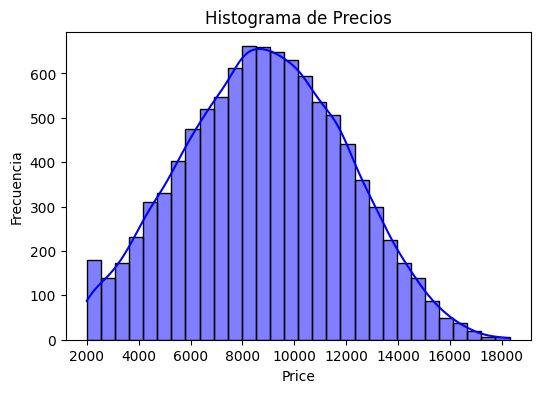

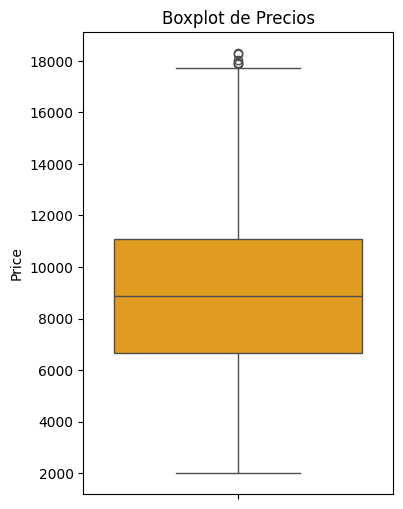

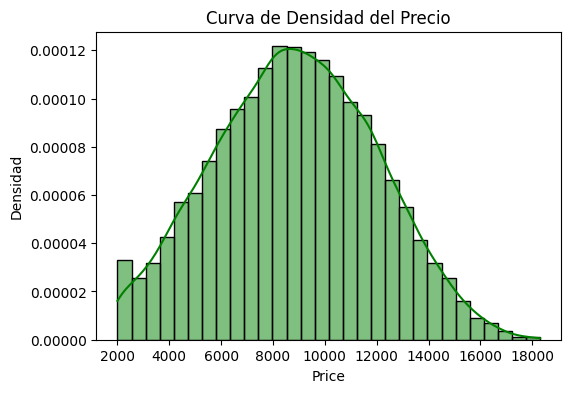

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import robust

# Cargar el dataset
df = pd.read_csv("/archive.zip")

# Seleccionar la columna a analizar
column = "Price"
data = df[column]

# Cálculo de métricas estadísticas
varianza = np.var(data, ddof=1)
desviacion_estandar = np.std(data, ddof=1)
desviacion_media_absoluta = np.mean(np.abs(data - np.mean(data)))
desviacion_absoluta_media = robust.scale.mad(data)
rango = np.max(data) - np.min(data)
percentiles = np.percentile(data, [25, 50, 75])
rango_intercuartil = percentiles[2] - percentiles[0]

# Resultados
estadisticas = {
    "Varianza": varianza,
    "Desviación Estándar": desviacion_estandar,
    "Desviación Media Absoluta": desviacion_media_absoluta,
    "Desviación Absoluta de la Media (MAD)": desviacion_absoluta_media,
    "Rango": rango,
    "Mediana (Estadística Ordinal)": percentiles[1],
    "Percentil 25": percentiles[0],
    "Percentil 50": percentiles[1],
    "Percentil 75": percentiles[2],
    "Rango Intercuartil (IQR)": rango_intercuartil
}

# Imprimir resultados
for key, value in estadisticas.items():
    print(f"{key}: {value}")

# Graficar histograma
plt.figure(figsize=(6,4))
sns.histplot(data, bins=30, kde=True, color='blue')
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.title("Histograma de Precios")
plt.show()

# Graficar boxplot
plt.figure(figsize=(4,6))
sns.boxplot(y=data, color='orange')
plt.ylabel("Price")
plt.title("Boxplot de Precios")
plt.show()

# Graficar diagrama de dispersión y curva de densidad
plt.figure(figsize=(6,4))
sns.histplot(data, bins=30, kde=True, stat="density", color='green')
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.title("Curva de Densidad del Precio")
plt.show()
